In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [163]:
df=pd.read_csv('processing1.csv',encoding='utf-8')
df['최고시청률']=df['최고시청률'].str.replace('%','')
df

,프로그램,방송요일,채널,연출,작가,출연,웹툰체크,편성시간,최고시청률,몇부작
0,아임쏘리 강남구,월화수목금,SBS,김효언,안홍란,"김민서,박선호,이인,이나경",0,20:30,15,120
1,사랑은 방울방울,월화수목금,SBS,김정민,김영인,"왕지혜,강은탁,공현주,김민수",0,19:20,9,120
2,황금주머니,월화수목금,MBC,김대진,이혜선,"진이한,정우연,서우림,지수원",0,20:55,10,122
3,빛나라 은수,월화수목금,KBS1,곽기원,김민주,"이영은,박하나,김동준,최정원",0,20:25,30,125
4,행복을 주는 사람,월화수목금,MBC,최창욱,박지현,"이윤지,하연주,이하율,김미경",0,19:15,11,118
...,...,...,...,...,...,...,...,...,...,...
583,산후조리원,월화,tvN,박수원,"김지수,최윤희,윤수민","엄지원,박하선,장혜진,윤박,최리",0,21:00,4,8
584,라이브온,월화,JTBC,김상우,방유정,"정다빈,황민현,노종현,양혜지,연우,최병찬,양정연",0,21:00,1,8
585,복수해라,토일,TV조선,강민구,김효진,"김사랑,윤현민,유선,정만식,윤소이,공현주",0,21:00,3,16
586,경이로운 소문,토일,OCN,유선동,여지나,"조병규,유준상,김세정,염혜란,안석환,문숙",1,22:30,11,16


In [164]:
df['최고시청률']=pd.to_numeric(df['최고시청률'])

In [165]:
df['최고시청률'].max()

49

In [166]:
#시청률 범주화
df['최고시청률범주화']=''
bins=[-1,5,10,15,20,25,30,60]
labels = ['0~5','5~10','10~15','15~20','20~25','25~30','30~']
df['최고시청률범주화']=pd.cut(x = df['최고시청률'],bins = bins, labels = labels)

In [167]:
#채널 범주화
ch_dic = {
    'MBC' : 'MBC',
    'SBS' : 'SBS',
    'KBS2' : 'KBS2',
    'tvN' : 'tvN',
    'OCN' : 'OCN',
    'JTBC' : 'JTBC',
    'KBS1' : 'KBS1',
    'SBSfunE' : 'Other',
    'SBS플러스' : 'Other',
    'TV조선' : 'TV조선',
    'MBN' : 'Other',
    'MBC every1' : 'Other',
    '채널A' : 'Other',
    'Olive' : 'Other',
    '드라맥스' : 'Other'
}

df['채널범주화'] = df['채널'].map(ch_dic)

In [168]:
df['채널'].unique()

array(['SBS', 'MBC', 'KBS1', 'KBS2', 'JTBC', 'tvN', '드라맥스', 'OCN', 'MBN',
       'TV조선', 'MBC every1', '채널A'], dtype=object)

In [169]:
df['편성시간'][0].split(':')[0]

'20'

In [170]:
#시간대
df['시간대']=''
for i in range(len(df)):
    df['시간대'][i]=df['편성시간'][i].split(':')[0]
df

<ipython-input-170-b5b0963ee27c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['시간대'][i]=df['편성시간'][i].split(':')[0]


,프로그램,방송요일,채널,연출,작가,출연,웹툰체크,편성시간,최고시청률,몇부작,최고시청률범주화,채널범주화,시간대
0,아임쏘리 강남구,월화수목금,SBS,김효언,안홍란,"김민서,박선호,이인,이나경",0,20:30,15,120,10~15,SBS,20
1,사랑은 방울방울,월화수목금,SBS,김정민,김영인,"왕지혜,강은탁,공현주,김민수",0,19:20,9,120,5~10,SBS,19
2,황금주머니,월화수목금,MBC,김대진,이혜선,"진이한,정우연,서우림,지수원",0,20:55,10,122,5~10,MBC,20
3,빛나라 은수,월화수목금,KBS1,곽기원,김민주,"이영은,박하나,김동준,최정원",0,20:25,30,125,25~30,KBS1,20
4,행복을 주는 사람,월화수목금,MBC,최창욱,박지현,"이윤지,하연주,이하율,김미경",0,19:15,11,118,10~15,MBC,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,산후조리원,월화,tvN,박수원,"김지수,최윤희,윤수민","엄지원,박하선,장혜진,윤박,최리",0,21:00,4,8,0~5,tvN,21
584,라이브온,월화,JTBC,김상우,방유정,"정다빈,황민현,노종현,양혜지,연우,최병찬,양정연",0,21:00,1,8,0~5,JTBC,21
585,복수해라,토일,TV조선,강민구,김효진,"김사랑,윤현민,유선,정만식,윤소이,공현주",0,21:00,3,16,0~5,TV조선,21
586,경이로운 소문,토일,OCN,유선동,여지나,"조병규,유준상,김세정,염혜란,안석환,문숙",1,22:30,11,16,10~15,OCN,22


In [171]:
df['시간대']=pd.to_numeric(df['시간대'])

In [172]:
#시간대 범주화
df['시간대범주화']=''
bins=[-1,7,10,18,20,24]
labels = ['새벽','아침','오후','저녁','밤']
df['시간대범주화']=pd.cut(x = df['시간대'],bins = bins, labels = labels)

In [173]:
#부작 범주화
bins=[0,15,30,70,150]
labels = ['~15','15~30','30~70','70~150']
df['부작범주화']=pd.cut(x = df['몇부작'],bins = bins, labels = labels)

In [174]:
df['시간대'].unique()

array([20, 19, 22, 21, 23,  0, 12,  8,  7,  9, 10, 18], dtype=int64)

In [175]:
df['방송요일'].unique()

array(['월화수목금', '토일', '월화', '금토', '수목', '월', '일', '토', '목', '금', '수',
       '월화수목', '화'], dtype=object)

In [176]:
#방송요일 범주화
ch_dic = {
    '월화수목금' : '월화수목금',
    '월' : '그외',
    '일' : '그외',
    '토' : '토',
    '목' : '그외',
    '금' : '금',
    '수' : '그외',
    '월화수목' : '그외',
    '화' : '그외',
    '토일' : '토일',
    '월화' : '월화',
    '수목' : '수목',
    '금토' : '금토'
}

df['요일범주화'] = df['방송요일'].map(ch_dic)

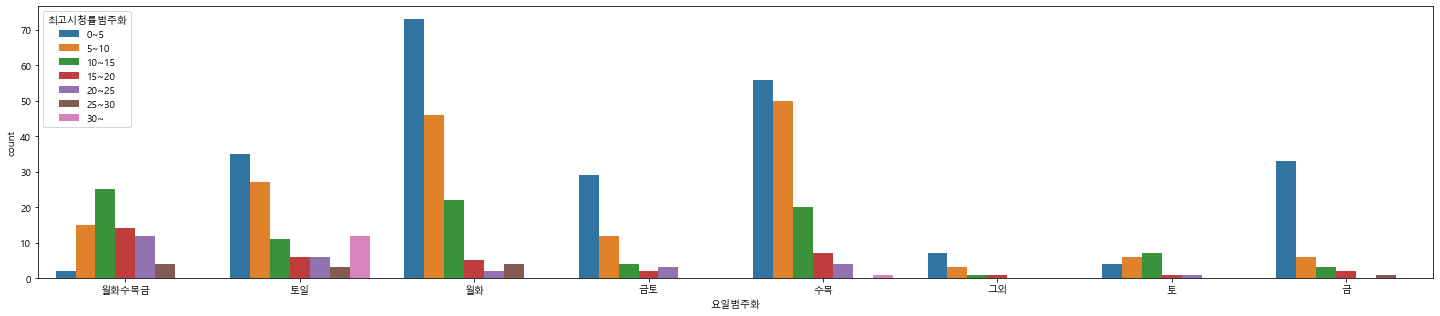

In [177]:
plt.figure(figsize=(25,5))
plt.rcParams['font.family'] = 'Malgun Gothic'
sns.countplot(data = df, x = '요일범주화', hue = '최고시청률범주화')

In [178]:
split = df['연출'].str.split(',')
split
split = split.apply(lambda x: pd.Series(x))
ex1 = split[[0,1]]
vc = pd.concat([ex1[0],ex1[1]])
vc.value_counts()
df['연출']=ex1[0]
ex1[0].value_counts()

송현욱    7
김철규    6
김정현    6
곽정환    6
김정민    6
      ..
윤여창    1
이정미    1
강효진    1
오종록    1
임세준    1
Name: 0, Length: 278, dtype: int64

In [179]:
split = df['작가'].str.split(',')
split
split = split.apply(lambda x: pd.Series(x))
ex1 = split[[0,1]]
vc = pd.concat([ex1[0],ex1[1]])
vc.value_counts()
df['작가']=ex1[0]

In [180]:
pw=pd.read_csv('연출,작가 범위.csv',encoding='euc-kr')
pw

,연출자,pd백분율,작가,wr백분율
0,강대선,1.000000,가성진,1.000000
1,강민경,1.000000,강성진,1.000000
2,강민구,0.500000,강은경,1.000000
3,강신효,0.666667,강은선,0.500000
4,강인,0.500000,강철웅,1.000000
...,...,...,...,...
391,NaN,1.000000,황예진,0.666667
392,NaN,1.000000,황은경,0.500000
393,NaN,1.000000,황조윤,0.500000
394,NaN,1.000000,황주하,1.000000


In [181]:
a=pw[['연출자','pd백분율']]
pd_list=[]
for i in range(len(a)):
    print(pw['연출자'][i],':',pw['pd백분율'][i])
    pd_list.append(pw['연출자'][i])

강대선 : 1.0
강민경 : 1.0
강민구 : 0.5
강신효 : 0.666666667
강인 : 0.5
강일수 : 0.666666667
강철우 : 0.2
강효진 : 0.5
강훈 : 0.5
고동선 : 1.0
고영탁 : 1.0
고재현 : 1.0
고흥식 : 1.0
곽기원 : 1.0
곽정환 : 0.428571429
권계홍 : 1.0
권석장 : 0.666666667
권성창 : 1.0
권영일 : 0.5
기민수 : 1.0
김가람 : 0.25
김경희 : 0.666666667
김규태 : 1.0
김근홍 : 1.0
김대진 : 1.0
김대현 : 0.5
김도형 : 0.5
김동휘 : 0.666666667
김명욱 : 1.0
김미숙 : 1.0
김민경 : 0.333333333
김민식 : 1.0
김병수 : 0.25
김상우 : 0.333333333
김상협 : 0.75
김상호 : 0.5
김상훈 : 0.5
김상휘 : 1.0
김석윤 : 0.5
김성수 : 0.5
김성용 : 1.0
김성욱 : 0.5
김성윤 : 1.0
김신일 : 0.8
김영균 : 1.0
김영조 : 1.0
김용민 : 1.0
김용수 : 0.333333333
김용완 : 1.0
김원석 : 1.0
김원용 : 1.0
김유진 : 0.333333333
김윤철 : 0.75
김정권 : 1.0
김정규 : 0.666666667
김정민 : 0.7142857140000001
김정식 : 0.5
김정현 : 0.571428571
김정호 : 1.0
김종선 : 1.0
김종연 : 0.666666667
김종창 : 1.0
김종혁 : 0.5
김종현 : 0.5
김진근 : 0.5
김진만 : 1.0
김진민 : 0.75
김진우 : 1.0
김진원 : 0.333333333
김창동 : 0.5
김철규 : 0.571428571
김평중 : 0.5
김형석 : 0.75
김형식 : 0.666666667
김형일 : 1.0
김홍선 : 0.4
김효언 : 0.666666667
김휘 : 0.5
김흥동 : 0.8
김희원 : 1.0
남건 : 0.75
남기훈 : 0.4
남성우 : 0.666666667
남태진 : 1.

In [182]:
#연출자 리스트 , 여기에 있으면 점수대로 주고 여기에 없으면 그외 로 해서 0.5를 준다..?
pd_list

['강대선',
 '강민경',
 '강민구',
 '강신효',
 '강인',
 '강일수',
 '강철우',
 '강효진',
 '강훈',
 '고동선',
 '고영탁',
 '고재현',
 '고흥식',
 '곽기원',
 '곽정환',
 '권계홍',
 '권석장',
 '권성창',
 '권영일',
 '기민수',
 '김가람',
 '김경희',
 '김규태',
 '김근홍',
 '김대진',
 '김대현',
 '김도형',
 '김동휘',
 '김명욱',
 '김미숙',
 '김민경',
 '김민식',
 '김병수',
 '김상우',
 '김상협',
 '김상호',
 '김상훈',
 '김상휘',
 '김석윤',
 '김성수',
 '김성용',
 '김성욱',
 '김성윤',
 '김신일',
 '김영균',
 '김영조',
 '김용민',
 '김용수',
 '김용완',
 '김원석',
 '김원용',
 '김유진',
 '김윤철',
 '김정권',
 '김정규',
 '김정민',
 '김정식',
 '김정현',
 '김정호',
 '김종선',
 '김종연',
 '김종창',
 '김종혁',
 '김종현',
 '김진근',
 '김진만',
 '김진민',
 '김진우',
 '김진원',
 '김창동',
 '김철규',
 '김평중',
 '김형석',
 '김형식',
 '김형일',
 '김홍선',
 '김효언',
 '김휘',
 '김흥동',
 '김희원',
 '남건',
 '남기훈',
 '남성우',
 '남태진',
 '노도철',
 '노상훈',
 '노종찬',
 '류승진',
 '모완일',
 '민두식',
 '민연홍',
 '민진기',
 '박경렬',
 '박기현',
 '박기호',
 '박만영',
 '박상훈',
 '박선호',
 '박수원',
 '박수진',
 '박수철',
 '박승우',
 '박신우',
 '박용순',
 '박원국',
 '박재범',
 '박준우',
 '박준화',
 '박진석',
 '박진우',
 '박찬율',
 '박찬홍',
 '박현석',
 '박형기',
 '박홍균',
 '배경수',
 '배태섭',
 '배한천',
 '백상훈',
 '백수찬',
 '백승룡',
 '백호민',
 '부성철',
 '선혜윤',
 '성용일',
 '성준

In [183]:
a=pw[['작가','wr백분율']]
wr_list=[]
for i in range(len(a)):
    print(pw['작가'][i],':',pw['wr백분율'][i])
    wr_list.append(pw['작가'][i])

가성진 : 1.0
강성진 : 1.0
강은경 : 1.0
강은선 : 0.5
강철웅 : 1.0
강현성 : 0.333333333
경민선 : 0.5
고영재 : 0.5
고은경 : 1.0
고정운 : 0.5
곽경윤 : 0.333333333
광진 : 1.0
구모 : 0.5
구지원 : 1.0
구현숙 : 1.0
권기영 : 0.666666667
권도은 : 0.5
권민수 : 1.0
권소라 : 0.5
권수민 : 0.5
권순규 : 1.0
권순원 : 0.5
권음미 : 1.0
권인찬 : 1.0
권혜주 : 1.0
권혜지 : 0.333333333
김경민 : 0.5
김경세 : 0.5
김경희 : 1.0
김규원 : 1.0
김기호 : 0.333333333
김남희 : 0.666666667
김도연 : 0.5
김도현 : 1.0
김동규 : 0.5
김루리 : 0.666666667
김미경 : 1.0
김미정 : 0.666666667
김민정 : 1.0
김민주 : 0.75
김반디 : 1.0
김번 : 0.5
김보연 : 0.5
김사경 : 1.0
김서연 : 1.0
김선덕 : 1.0
김선미 : 0.5
김선희 : 1.0
김성민 : 0.5
김솔지 : 0.333333333
김수은 : 1.0
김수진 : 1.0
김수현 : 1.0
김순옥 : 1.0
김신혜 : 0.333333333
김아정 : 0.5
김양기 : 0.5
김연신 : 1.0
김영인 : 1.0
김영현 : 1.0
김예나 : 1.0
김원석 : 0.5
김윤영 : 1.0
김윤주 : 0.333333333
김윤희 : 0.5
김은 : 1.0
김은숙 : 1.0
김은정 : 0.666666667
김은지 : 1.0
김은하 : 0.5
김은향 : 0.666666667
김은희 : 1.0
김이랑 : 0.5
김이영 : 1.0
김이지 : 1.0
김인강 : 1.0
김인영 : 1.0
김정민 : 1.0
김정수 : 1.0
김주 : 1.0
김주만 : 0.5
김지선 : 0.5
김지수 : 0.666666667
김지완 : 1.0
김지우 : 0.666666667
김지운 : 1.0
김지은 : 1.0
김지현 : 0.5
김진경 

In [184]:
wr_list

['가성진',
 '강성진',
 '강은경',
 '강은선',
 '강철웅',
 '강현성',
 '경민선',
 '고영재',
 '고은경',
 '고정운',
 '곽경윤',
 '광진',
 '구모',
 '구지원',
 '구현숙',
 '권기영',
 '권도은',
 '권민수',
 '권소라',
 '권수민',
 '권순규',
 '권순원',
 '권음미',
 '권인찬',
 '권혜주',
 '권혜지',
 '김경민',
 '김경세',
 '김경희',
 '김규원',
 '김기호',
 '김남희',
 '김도연',
 '김도현',
 '김동규',
 '김루리',
 '김미경',
 '김미정',
 '김민정',
 '김민주',
 '김반디',
 '김번',
 '김보연',
 '김사경',
 '김서연',
 '김선덕',
 '김선미',
 '김선희',
 '김성민',
 '김솔지',
 '김수은',
 '김수진',
 '김수현',
 '김순옥',
 '김신혜',
 '김아정',
 '김양기',
 '김연신',
 '김영인',
 '김영현',
 '김예나',
 '김원석',
 '김윤영',
 '김윤주',
 '김윤희',
 '김은',
 '김은숙',
 '김은정',
 '김은지',
 '김은하',
 '김은향',
 '김은희',
 '김이랑',
 '김이영',
 '김이지',
 '김인강',
 '김인영',
 '김정민',
 '김정수',
 '김주',
 '김주만',
 '김지선',
 '김지수',
 '김지완',
 '김지우',
 '김지운',
 '김지은',
 '김지현',
 '김진경',
 '김진희',
 '김태희',
 '김하나',
 '김현정',
 '김혜영',
 '김호수',
 '김홍주',
 '김효진',
 '남상욱',
 '노선재',
 '노지설',
 '노혜영',
 '노희경',
 '도현',
 '도현정',
 '류보리',
 '류용재',
 '마주희',
 '마진원',
 '명수현',
 '문만세',
 '문선희',
 '문소산',
 '문수연',
 '문영남',
 '문영훈',
 '문유석',
 '문은아',
 '문정민',
 '문현경',
 '문희정',
 '민지은',
 '민지형',
 '박가연',
 '박경수',
 '박계옥',
 '박계형'

In [185]:
#연출자
pd_dic = {'강대선' : 1.0,
'강민경' : 1.0,
'강민구' : 0.5,
'강신효' : 0.666666667,
'강인' : 0.5,
'강일수' : 0.666666667,
'강철우' : 0.2,
'강효진' : 0.5,
'강훈' : 0.5,
'고동선' : 1.0,
'고영탁' : 1.0,
'고재현' : 1.0,
'고흥식' : 1.0,
'곽기원' : 1.0,
'곽정환' : 0.428571429,
'권계홍' : 1.0,
'권석장' : 0.666666667,
'권성창' : 1.0,
'권영일' : 0.5,
'기민수' : 1.0,
'김가람' : 0.25,
'김경희' : 0.666666667,
'김규태' : 1.0,
'김근홍' : 1.0,
'김대진' : 1.0,
'김대현' : 0.5,
'김도형' : 0.5,
'김동휘' : 0.666666667,
'김명욱' : 1.0,
'김미숙' : 1.0,
'김민경' : 0.333333333,
'김민식' : 1.0,
'김병수' : 0.25,
'김상우' : 0.333333333,
'김상협' : 0.75,
'김상호' : 0.5,
'김상훈' : 0.5,
'김상휘' : 1.0,
'김석윤' : 0.5,
'김성수' : 0.5,
'김성용' : 1.0,
'김성욱' : 0.5,
'김성윤' : 1.0,
'김신일' : 0.8,
'김영균' : 1.0,
'김영조' : 1.0,
'김용민' : 1.0,
'김용수' : 0.333333333,
'김용완' : 1.0,
'김원석' : 1.0,
'김원용' : 1.0,
'김유진' : 0.333333333,
'김윤철' : 0.75,
'김정권' : 1.0,
'김정규' : 0.666666667,
'김정민' : 0.7142857140000001,
'김정식' : 0.5,
'김정현' : 0.571428571,
'김정호' : 1.0,
'김종선' : 1.0,
'김종연' : 0.666666667,
'김종창' : 1.0,
'김종혁' : 0.5,
'김종현' : 0.5,
'김진근' : 0.5,
'김진만' : 1.0,
'김진민' : 0.75,
'김진우' : 1.0,
'김진원' : 0.333333333,
'김창동' : 0.5,
'김철규' : 0.571428571,
'김평중' : 0.5,
'김형석' : 0.75,
'김형식' : 0.666666667,
'김형일' : 1.0,
'김홍선' : 0.4,
'김효언' : 0.666666667,
'김휘' : 0.5,
'김흥동' : 0.8,
'김희원' : 1.0,
'남건' : 0.75,
'남기훈' : 0.4,
'남성우' : 0.666666667,
'남태진' : 1.0,
'노도철' : 1.0,
'노상훈' : 0.5,
'노종찬' : 0.5,
'류승진' : 0.5,
'모완일' : 0.75,
'민두식' : 0.5,
'민연홍' : 0.5,
'민진기' : 0.333333333,
'박경렬' : 1.0,
'박기현' : 1.0,
'박기호' : 0.666666667,
'박만영' : 0.5,
'박상훈' : 1.0,
'박선호' : 0.75,
'박수원' : 0.333333333,
'박수진' : 1.0,
'박수철' : 0.5,
'박승우' : 0.5,
'박신우' : 0.8,
'박용순' : 1.0,
'박원국' : 1.0,
'박재범' : 1.0,
'박준우' : 1.0,
'박준화' : 0.333333333,
'박진석' : 0.5,
'박진우' : 0.5,
'박찬율' : 0.5,
'박찬홍' : 0.666666667,
'박현석' : 0.666666667,
'박형기' : 1.0,
'박홍균' : 1.0,
'배경수' : 0.5,
'배태섭' : 1.0,
'배한천' : 1.0,
'백상훈' : 1.0,
'백수찬' : 1.0,
'백승룡' : 0.333333333,
'백호민' : 1.0,
'부성철' : 1.0,
'선혜윤' : 0.333333333,
'성용일' : 0.5,
'성준해' : 1.0,
'손정현' : 0.75,
'손형석' : 1.0,
'송지원' : 0.5,
'송현욱' : 0.375,
'신경수' : 1.0,
'신용휘' : 0.6,
'신우철' : 0.666666667,
'신원호' : 1.0,
'신윤섭' : 0.666666667,
'신창석' : 1.0,
'심나연' : 0.5,
'심재현' : 0.5,
'안길호' : 1.0,
'안준용' : 0.5,
'안판석' : 1.0,
'양윤호' : 0.5,
'어수선' : 1.0,
'오경훈' : 0.75,
'오세강' : 1.0,
'오종록' : 1.0,
'오진석' : 0.75,
'오충환' : 0.666666667,
'오현종' : 0.6,
'오현창' : 1.0,
'유선동' : 1.0,
'유영은' : 0.5,
'유인식' : 1.0,
'유제원' : 0.5,
'유종선' : 0.666666667,
'유학찬' : 0.5,
'유현기' : 0.5,
'유호진' : 1.0,
'윤류해' : 1.0,
'윤상호' : 1.0,
'윤성식' : 0.666666667,
'윤여창' : 0.5,
'윤재문' : 1.0,
'윤창범' : 1.0,
'이강현' : 1.0,
'이건준' : 1.0,
'이광영' : 0.75,
'이권' : 0.5,
'이나정' : 1.0,
'이대영' : 1.0,
'이덕건' : 1.0,
'이동윤' : 0.666666667,
'이동현' : 0.5,
'이동훈' : 0.5,
'이명우' : 1.0,
'이병헌' : 0.5,
'이병훈' : 1.0,
'이상엽' : 0.75,
'이성준' : 1.0,
'이소연' : 0.5,
'이승영' : 0.666666667,
'이승훈' : 0.5,
'이용석' : 1.0,
'이윤정' : 0.4,
'이은진' : 0.333333333,
'이응복' : 1.0,
'이재동' : 1.0,
'이재상' : 1.0,
'이재진' : 0.75,
'이재훈' : 0.4,
'이정림' : 1.0,
'이정미' : 0.5,
'이정섭' : 1.0,
'이정효' : 1.0,
'이정훈' : 1.0,
'이정흠' : 0.75,
'이종재' : 0.5,
'이준형' : 0.5,
'이창민' : 0.4,
'이창한' : 0.5,
'이창희' : 0.5,
'이태곤' : 0.2,
'이현주' : 0.25,
'이현직' : 1.0,
'이형민' : 0.428571429,
'이형선' : 1.0,
'임대웅' : 0.5,
'임세준' : 0.5,
'임태우' : 0.5,
'장영우' : 0.5,
'장용우' : 0.333333333,
'장정도' : 0.5,
'장준호' : 0.333333333,
'장태유' : 1.0,
'전산' : 1.0,
'전성홍' : 1.0,
'전우성' : 0.6,
'전창근' : 0.333333333,
'정대윤' : 0.75,
'정동윤' : 1.0,
'정윤수' : 1.0,
'정정화' : 0.666666667,
'정지인' : 0.75,
'정지현' : 0.5,
'정헌수' : 0.5,
'정형건' : 0.5,
'정효' : 1.0,
'조나은' : 0.5,
'조남국' : 0.4,
'조수원' : 1.0,
'조영광' : 1.0,
'조영민' : 0.666666667,
'조웅' : 1.0,
'조창완' : 0.5,
'조현탁' : 0.666666667,
'주동민' : 0.666666667,
'주성우' : 1.0,
'지병현' : 0.666666667,
'지영수' : 0.666666667,
'진창규' : 0.333333333,
'진혁' : 1.0,
'진형욱' : 0.75,
'차영훈' : 0.8,
'최규식' : 0.333333333,
'최도훈' : 0.333333333,
'최문석' : 1.0,
'최병길' : 1.0,
'최성범' : 0.666666667,
'최영훈' : 1.0,
'최원석' : 1.0,
'최윤석' : 0.666666667,
'최은경' : 1.0,
'최이섭' : 1.0,
'최정규' : 1.0,
'최준배' : 1.0,
'최지영' : 1.0,
'최창욱' : 1.0,
'표민수' : 0.5,
'하병훈' : 0.666666667,
'한동화' : 0.25,
'한상우' : 1.0,
'한상재' : 0.2,
'한준서' : 1.0,
'한지승' : 0.333333333,
'한철경' : 1.0,
'한철수' : 0.666666667,
'한희' : 1.0,
'함준호' : 1.0,
'현솔잎' : 0.5,
'홍석구' : 0.8,
'홍성창' : 1.0,
'홍종찬' : 0.833333333,
'황승기' : 0.5,
'황의경' : 1.0,
'황인뢰' : 0.5,
'황인혁' : 1.0,
'황준혁' : 1.0,
'그외':0.5}

In [186]:
#작가
wr_dic = {'가성진' : 1.0,
'강성진' : 1.0,
'강은경' : 1.0,
'강은선' : 0.5,
'강철웅' : 1.0,
'강현성' : 0.333333333,
'경민선' : 0.5,
'고영재' : 0.5,
'고은경' : 1.0,
'고정운' : 0.5,
'곽경윤' : 0.333333333,
'광진' : 1.0,
'구모' : 0.5,
'구지원' : 1.0,
'구현숙' : 1.0,
'권기영' : 0.666666667,
'권도은' : 0.5,
'권민수' : 1.0,
'권소라' : 0.5,
'권수민' : 0.5,
'권순규' : 1.0,
'권순원' : 0.5,
'권음미' : 1.0,
'권인찬' : 1.0,
'권혜주' : 1.0,
'권혜지' : 0.333333333,
'김경민' : 0.5,
'김경세' : 0.5,
'김경희' : 1.0,
'김규원' : 1.0,
'김기호' : 0.333333333,
'김남희' : 0.666666667,
'김도연' : 0.5,
'김도현' : 1.0,
'김동규' : 0.5,
'김루리' : 0.666666667,
'김미경' : 1.0,
'김미정' : 0.666666667,
'김민정' : 1.0,
'김민주' : 0.75,
'김반디' : 1.0,
'김번' : 0.5,
'김보연' : 0.5,
'김사경' : 1.0,
'김서연' : 1.0,
'김선덕' : 1.0,
'김선미' : 0.5,
'김선희' : 1.0,
'김성민' : 0.5,
'김솔지' : 0.333333333,
'김수은' : 1.0,
'김수진' : 1.0,
'김수현' : 1.0,
'김순옥' : 1.0,
'김신혜' : 0.333333333,
'김아정' : 0.5,
'김양기' : 0.5,
'김연신' : 1.0,
'김영인' : 1.0,
'김영현' : 1.0,
'김예나' : 1.0,
'김원석' : 0.5,
'김윤영' : 1.0,
'김윤주' : 0.333333333,
'김윤희' : 0.5,
'김은' : 1.0,
'김은숙' : 1.0,
'김은정' : 0.666666667,
'김은지' : 1.0,
'김은하' : 0.5,
'김은향' : 0.666666667,
'김은희' : 1.0,
'김이랑' : 0.5,
'김이영' : 1.0,
'김이지' : 1.0,
'김인강' : 1.0,
'김인영' : 1.0,
'김정민' : 1.0,
'김정수' : 1.0,
'김주' : 1.0,
'김주만' : 0.5,
'김지선' : 0.5,
'김지수' : 0.666666667,
'김지완' : 1.0,
'김지우' : 0.666666667,
'김지운' : 1.0,
'김지은' : 1.0,
'김지현' : 0.5,
'김진경' : 0.5,
'김진희' : 0.5,
'김태희' : 0.666666667,
'김하나' : 0.5,
'김현정' : 0.666666667,
'김혜영' : 0.5,
'김호수' : 0.666666667,
'김홍주' : 1.0,
'김효진' : 0.5,
'남상욱' : 0.5,
'노선재' : 0.5,
'노지설' : 1.0,
'노혜영' : 0.666666667,
'노희경' : 1.0,
'도현' : 0.5,
'도현정' : 1.0,
'류보리' : 0.5,
'류용재' : 0.333333333,
'마주희' : 1.0,
'마진원' : 1.0,
'명수현' : 0.25,
'문만세' : 0.5,
'문선희' : 1.0,
'문소산' : 0.5,
'문수연' : 0.5,
'문영남' : 1.0,
'문영훈' : 1.0,
'문유석' : 0.5,
'문은아' : 1.0,
'문정민' : 0.5,
'문현경' : 0.5,
'문희정' : 1.0,
'민지은' : 1.0,
'민지형' : 0.5,
'박가연' : 0.5,
'박경수' : 1.0,
'박계옥' : 1.0,
'박계형' : 1.0,
'박미령' : 0.5,
'박민주' : 1.0,
'박상규' : 1.0,
'박선자' : 0.5,
'박성진' : 0.5,
'박소영' : 0.5,
'박승혜' : 0.5,
'박언희' : 1.0,
'박연선' : 0.333333333,
'박예경' : 1.0,
'박유미' : 1.0,
'박은령' : 1.0,
'박은영' : 1.0,
'박은정' : 0.333333333,
'박재범' : 1.0,
'박정란' : 1.0,
'박정화' : 0.5,
'박주연' : 1.0,
'박지은' : 1.0,
'박지하' : 1.0,
'박지현' : 1.0,
'박진우' : 1.0,
'박찬영' : 0.5,
'박찬홍' : 1.0,
'박필주' : 1.0,
'박해영' : 1.0,
'박현주' : 1.0,
'박혜련' : 0.666666667,
'박혜진' : 1.0,
'박효연' : 0.333333333,
'박희강' : 0.5,
'박희권' : 0.5,
'반기리' : 0.5,
'방유정' : 0.5,
'방지영' : 1.0,
'배수영' : 0.5,
'배유미' : 1.0,
'백미경' : 0.666666667,
'백영숙' : 1.0,
'백운철' : 1.0,
'백은경' : 0.5,
'백은진' : 0.5,
'백정철' : 0.5,
'변상순' : 1.0,
'서보라' : 0.5,
'서숙향' : 1.0,
'서신혜' : 1.0,
'서영희' : 0.5,
'서은정' : 1.0,
'서인' : 1.0,
'서재원' : 0.5,
'서정' : 1.0,
'서주연' : 0.5,
'서현주' : 1.0,
'설경은' : 1.0,
'설준석' : 0.5,
'소원' : 0.5,
'소재원' : 1.0,
'소현경' : 1.0,
'손근주' : 1.0,
'손세린' : 0.25,
'손영목' : 1.0,
'손은혜' : 0.5,
'손지혜' : 1.0,
'손현수' : 0.5,
'손황원' : 1.0,
'송윤희' : 1.0,
'송재정' : 1.0,
'송정림' : 1.0,
'송지나' : 1.0,
'송하영' : 0.5,
'송혜진' : 0.5,
'신소라' : 1.0,
'신수림' : 0.5,
'신유담' : 1.0,
'신재형' : 1.0,
'안도하' : 0.5,
'안서정' : 1.0,
'안신유' : 0.5,
'안호경' : 0.5,
'안홍란' : 1.0,
'양진아' : 0.333333333,
'양혁문' : 0.333333333,
'양희승' : 0.8,
'여정미' : 0.5,
'여지나' : 1.0,
'연상호' : 1.0,
'염일호' : 1.0,
'오보현' : 1.0,
'오상희' : 1.0,
'오지영' : 0.75,
'원영옥' : 1.0,
'유경선' : 1.0,
'유병재' : 0.5,
'유보라' : 0.5,
'유성열' : 0.333333333,
'유소정' : 0.5,
'유영석' : 0.5,
'유영선' : 0.5,
'유영아' : 1.0,
'유윤경' : 1.0,
'유은하' : 1.0,
'유정희' : 0.5,
'유현미' : 1.0,
'유희경' : 0.666666667,
'윤경아' : 0.666666667,
'윤난중' : 0.333333333,
'윤선주' : 1.0,
'윤수정' : 0.5,
'윤영미' : 1.0,
'윤지수' : 0.5,
'윤현호' : 1.0,
'윤효제' : 1.0,
'은주영' : 1.0,
'이경희' : 0.666666667,
'이근영' : 1.0,
'이남규' : 0.5,
'이대일' : 0.4,
'이도현' : 1.0,
'이명숙' : 0.5,
'이명희' : 1.0,
'이미나' : 0.5,
'이민재' : 0.5,
'이병헌' : 0.5,
'이서윤' : 0.5,
'이선영' : 1.0,
'이선혜' : 0.5,
'이선희' : 1.0,
'이성민' : 1.0,
'이성은' : 0.5,
'이소정' : 0.5,
'이수연' : 1.0,
'이수현' : 0.5,
'이숙연' : 0.666666667,
'이숙진' : 1.0,
'이승진' : 0.5,
'이신화' : 1.0,
'이아람' : 1.0,
'이영미' : 0.5,
'이영철' : 0.666666667,
'이우정' : 1.0,
'이유진' : 0.333333333,
'이은미' : 1.0,
'이은영' : 0.5,
'이은주' : 1.0,
'이인혜' : 1.0,
'이재곤' : 0.5,
'이재윤' : 0.5,
'이정대' : 1.0,
'이정민' : 0.5,
'이정선' : 1.0,
'이정아' : 0.5,
'이정우' : 1.0,
'이정화' : 0.5,
'이지민' : 0.5,
'이지효' : 0.5,
'이진매' : 0.5,
'이향희' : 0.666666667,
'이현' : 0.5,
'이현주' : 1.0,
'이혜선' : 0.666666667,
'이희명' : 1.0,
'임메아' : 0.5,
'임상춘' : 1.0,
'임서라' : 0.5,
'임수미' : 0.333333333,
'임예진' : 0.666666667,
'임희철' : 1.0,
'장민석' : 0.5,
'장영철' : 1.0,
'장진아' : 0.333333333,
'장혁린' : 0.75,
'장현주' : 1.0,
'장홍철' : 0.5,
'전영신' : 0.333333333,
'전유리' : 1.0,
'전호성' : 1.0,
'전희영' : 0.5,
'정도윤' : 1.0,
'정보훈' : 1.0,
'정서경' : 0.5,
'정성주' : 1.0,
'정성희' : 1.0,
'정수미' : 0.5,
'정유경' : 1.0,
'정유리' : 0.5,
'정유선' : 0.5,
'정윤정' : 0.5,
'정은영' : 1.0,
'정이도' : 0.25,
'정지우' : 1.0,
'정찬미' : 1.0,
'정하연' : 0.5,
'정현민' : 1.0,
'정현정' : 1.0,
'정형수' : 1.0,
'정회현' : 1.0,
'제인' : 1.0,
'조규원' : 1.0,
'조성희' : 1.0,
'조수진' : 1.0,
'조승희' : 0.5,
'조용' : 0.75,
'조윤영' : 1.0,
'조은정' : 1.0,
'조정선' : 1.0,
'조정우' : 1.0,
'조진국' : 0.5,
'조현경' : 0.666666667,
'주현' : 0.5,
'주화미' : 0.333333333,
'진수완' : 0.666666667,
'진영' : 1.0,
'차연주' : 0.5,
'차해원' : 1.0,
'채승대' : 0.666666667,
'채혜영' : 1.0,
'천성일' : 0.666666667,
'최경' : 0.5,
'최경미' : 1.0,
'최대웅' : 0.5,
'최란' : 0.5,
'최민기' : 1.0,
'최민석' : 0.5,
'최수미' : 1.0,
'최수영' : 1.0,
'최수진' : 1.0,
'최순식' : 1.0,
'최연걸' : 1.0,
'최완규' : 1.0,
'최윤교' : 1.0,
'최윤정' : 1.0,
'최지연' : 0.5,
'최진영' : 1.0,
'최진원' : 0.75,
'최현옥' : 1.0,
'최호철' : 0.666666667,
'최효비' : 0.5,
'추혜미' : 0.5,
'하명희' : 1.0,
'하윤아' : 0.5,
'하청옥' : 1.0,
'한가람' : 0.5,
'한상운' : 1.0,
'한설희' : 0.25,
'한영미' : 1.0,
'한우리' : 0.666666667,
'한정훈' : 0.5,
'한지완' : 0.666666667,
'한지훈' : 0.75,
'한희정' : 0.5,
'허선희' : 0.666666667,
'허성혜' : 0.5,
'허성희' : 1.0,
'허준우' : 1.0,
'현고운' : 0.5,
'홍승현' : 0.333333333,
'홍승희' : 1.0,
'홍영희' : 1.0,
'홍정은' : 1.0,
'홍진아' : 0.5,
'홍현영' : 1.0,
'황다은' : 0.5,
'황숙미' : 0.5,
'황순영' : 1.0,
'황예진' : 0.666666667,
'황은경' : 0.5,
'황조윤' : 0.5,
'황주하' : 1.0,
'황진영' : 1.0,
'그외' : 0.5}

In [187]:
pw[['작가','wr백분율']]

,작가,wr백분율
0,가성진,1.000000
1,강성진,1.000000
2,강은경,1.000000
3,강은선,0.500000
4,강철웅,1.000000
...,...,...
391,황예진,0.666667
392,황은경,0.500000
393,황조윤,0.500000
394,황주하,1.000000


In [188]:
split = df['출연'].str.split(',')
split
split = split.apply(lambda x: pd.Series(x))
ex1 = split[[0,1,2,3]]
df['배우1'] = ex1[0]
df['배우2'] = ex1[1]

In [189]:
df2=df[df['최고시청률']>5]
df2

,프로그램,방송요일,채널,연출,작가,출연,웹툰체크,편성시간,최고시청률,몇부작,최고시청률범주화,채널범주화,시간대,시간대범주화,부작범주화,요일범주화,배우1,배우2
0,아임쏘리 강남구,월화수목금,SBS,김효언,안홍란,"김민서,박선호,이인,이나경",0,20:30,15,120,10~15,SBS,20,저녁,70~150,월화수목금,김민서,박선호
1,사랑은 방울방울,월화수목금,SBS,김정민,김영인,"왕지혜,강은탁,공현주,김민수",0,19:20,9,120,5~10,SBS,19,저녁,70~150,월화수목금,왕지혜,강은탁
2,황금주머니,월화수목금,MBC,김대진,이혜선,"진이한,정우연,서우림,지수원",0,20:55,10,122,5~10,MBC,20,저녁,70~150,월화수목금,진이한,정우연
3,빛나라 은수,월화수목금,KBS1,곽기원,김민주,"이영은,박하나,김동준,최정원",0,20:25,30,125,25~30,KBS1,20,저녁,70~150,월화수목금,이영은,박하나
4,행복을 주는 사람,월화수목금,MBC,최창욱,박지현,"이윤지,하연주,이하율,김미경",0,19:15,11,118,10~15,MBC,19,저녁,70~150,월화수목금,이윤지,하연주
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
576,구미호뎐,수목,tvN,강신효,한우리,"이동욱,조보아,김범,김용지,황희,김정난",0,22:30,6,16,5~10,tvN,22,밤,15~30,수목,이동욱,조보아
580,펜트하우스,월화,SBS,주동민,김순옥,"이지아,김소연,유진,엄기준,신은경,봉태규,윤종훈",0,22:00,29,21,25~30,SBS,22,밤,15~30,월화,이지아,김소연
582,날아라 개천용,금,SBS,곽정환,박상규,"권상우,배성우,김주현,정웅인,김응수,조성하",0,22:00,6,20,5~10,SBS,22,밤,15~30,금,권상우,배성우
586,경이로운 소문,토일,OCN,유선동,여지나,"조병규,유준상,김세정,염혜란,안석환,문숙",1,22:30,11,16,10~15,OCN,22,밤,15~30,토일,조병규,유준상


In [190]:
actor_five=[]
for i in df2['배우1']:
    actor_five.append(i)
for j in df2['배우2']:
    actor_five.append(j)

In [191]:
#배우
actor_list=[]
for i in range(len(df)):
    actor_list.append(df['배우1'][i])
    actor_list.append(df['배우2'][i])
actor_list

['김민서',
 '박선호',
 '왕지혜',
 '강은탁',
 '진이한',
 '정우연',
 '이영은',
 '박하나',
 '이윤지',
 '하연주',
 '김재원',
 '박은빈',
 '명세빈',
 '김승수',
 '선우재덕',
 '강별',
 '김소은',
 '송재림',
 '손호준',
 '임지연',
 '이동건',
 '조윤희',
 '윤아정',
 '이민우',
 '박서준',
 '고아라',
 '김현수',
 '장동윤',
 '전지현',
 '이민호',
 '이요원',
 '진구',
 '공유',
 '이동욱',
 '한석규',
 '유연석',
 '이성경',
 '남주혁',
 '허정은',
 '오지호',
 '김현숙',
 '고세원',
 '조진웅',
 '서강준',
 '김지영',
 '이민영',
 '수애',
 '김영광',
 '이선균',
 '송지효',
 '이시아',
 '김진우',
 '소이현',
 '오민석',
 '하석진',
 '전소민',
 '최명길',
 '허이재',
 '박민지',
 '김정훈',
 '최지우',
 '주진모',
 '지창욱',
 '송윤아',
 '홍은희',
 '박건형',
 '김하늘',
 '이상윤',
 '서인국',
 '남지현',
 '공효진',
 '조정석',
 '진세연',
 '고수',
 '이준기',
 '이지은',
 '우희진',
 '현우성',
 '하석진',
 '박하선',
 '김현주',
 '주상욱',
 '박보검',
 '김유정',
 '김희애',
 '지진희',
 '강지환',
 '성유리',
 '이종석',
 '한효주',
 '김우빈',
 '배수지',
 '나해령',
 '이창욱',
 '옥택연',
 '김소현',
 '전도연',
 '유지태',
 '한예리',
 '한승연',
 '김래원',
 '박신혜',
 '김영철',
 '원미경',
 '이순재',
 '강부자',
 '안재욱',
 '소유진',
 '김아중',
 '지현우',
 '마동석',
 '서인국',
 '장혁',
 '박소담',
 '남궁민',
 '방민아',
 '윤시윤',
 '김새론',
 '황정음',
 '류준열',
 '고현정',
 '김혜자',
 '천정명',
 '조재현',
 '에릭',
 '서현진'

In [192]:
pd.Series(actor_list).to_csv('전체배우리스트.csv',encoding='euc-kr')
pd.Series(actor_five).to_csv('5퍼이상배우리스트.csv',encoding='euc-kr')

In [193]:
ac = pd.read_csv('연출,작가,배우 범위.csv',encoding='euc-kr')
ac[['중복제거 배우','백분율']]
df['배우1맵핑']=0.5
df['배우2맵핑']=0.5

for i in range(len(df)):
    for j in range(len(ac)):
        if df['배우1'][i]==ac['중복제거 배우'][j]:
            df['배우1맵핑'][i]=ac['백분율'][j]
for i in range(len(df)):
    for j in range(len(ac)):
        if df['배우2'][i]==ac['중복제거 배우'][j]:
            df['배우2맵핑'][i]=ac['백분율'][j]

<ipython-input-193-c2ab0b22a0f9>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['배우1맵핑'][i]=ac['백분율'][j]
<ipython-input-193-c2ab0b22a0f9>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['배우2맵핑'][i]=ac['백분율'][j]


In [194]:
for i in range(len(df)):
    if df['연출'][i] not in pd_list:
        df['연출'][i]='그외'

<ipython-input-194-cef051aeddc5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['연출'][i]='그외'


In [195]:
for i in range(len(df)):
    if df['작가'][i] not in wr_list:
        df['작가'][i]='그외'

<ipython-input-195-4b9440e61dc8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['작가'][i]='그외'


In [196]:
#작가 연출자 맵핑
df['pd맵핑'] = df['연출'].map(pd_dic)
df['wr맵핑'] = df['작가'].map(wr_dic)

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   프로그램      588 non-null    object  
 1   방송요일      588 non-null    object  
 2   채널        588 non-null    object  
 3   연출        588 non-null    object  
 4   작가        588 non-null    object  
 5   출연        588 non-null    object  
 6   웹툰체크      588 non-null    int64   
 7   편성시간      588 non-null    object  
 8   최고시청률     588 non-null    int64   
 9   몇부작       588 non-null    int64   
 10  최고시청률범주화  588 non-null    category
 11  채널범주화     588 non-null    object  
 12  시간대       588 non-null    int64   
 13  시간대범주화    588 non-null    category
 14  부작범주화     588 non-null    category
 15  요일범주화     588 non-null    object  
 16  배우1       588 non-null    object  
 17  배우2       588 non-null    object  
 18  배우1맵핑     588 non-null    float64 
 19  배우2맵핑     588 non-null    float64 
 20  pd맵핑      

In [198]:
#이전작 합치기
# merge=pd.read_csv('merge.csv',encoding='utf-8')
# merge = merge[['프로그램','이전작 시청률']]
# df=pd.merge(df,merge,on='프로그램',how='left')
# df=df.drop_duplicates(['프로그램'], keep = 'first')
# df.info()

In [199]:
df

,프로그램,방송요일,채널,연출,작가,출연,웹툰체크,편성시간,최고시청률,몇부작,...,시간대,시간대범주화,부작범주화,요일범주화,배우1,배우2,배우1맵핑,배우2맵핑,pd맵핑,wr맵핑
0,아임쏘리 강남구,월화수목금,SBS,김효언,안홍란,"김민서,박선호,이인,이나경",0,20:30,15,120,...,20,저녁,70~150,월화수목금,김민서,박선호,1.000000,0.600000,0.666667,1.000000
1,사랑은 방울방울,월화수목금,SBS,김정민,김영인,"왕지혜,강은탁,공현주,김민수",0,19:20,9,120,...,19,저녁,70~150,월화수목금,왕지혜,강은탁,1.000000,1.000000,0.714286,1.000000
2,황금주머니,월화수목금,MBC,김대진,이혜선,"진이한,정우연,서우림,지수원",0,20:55,10,122,...,20,저녁,70~150,월화수목금,진이한,정우연,0.666667,1.000000,1.000000,0.666667
3,빛나라 은수,월화수목금,KBS1,곽기원,김민주,"이영은,박하나,김동준,최정원",0,20:25,30,125,...,20,저녁,70~150,월화수목금,이영은,박하나,1.000000,0.625000,1.000000,0.750000
4,행복을 주는 사람,월화수목금,MBC,최창욱,박지현,"이윤지,하연주,이하율,김미경",0,19:15,11,118,...,19,저녁,70~150,월화수목금,이윤지,하연주,0.666667,0.750000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,산후조리원,월화,tvN,박수원,김지수,"엄지원,박하선,장혜진,윤박,최리",0,21:00,4,8,...,21,밤,~15,월화,엄지원,박하선,0.600000,0.250000,0.333333,0.666667
584,라이브온,월화,JTBC,김상우,방유정,"정다빈,황민현,노종현,양혜지,연우,최병찬,양정연",0,21:00,1,8,...,21,밤,~15,월화,정다빈,황민현,0.500000,0.500000,0.333333,0.500000
585,복수해라,토일,TV조선,강민구,김효진,"김사랑,윤현민,유선,정만식,윤소이,공현주",0,21:00,3,16,...,21,밤,15~30,토일,김사랑,윤현민,0.333333,0.555556,0.500000,0.500000
586,경이로운 소문,토일,OCN,유선동,여지나,"조병규,유준상,김세정,염혜란,안석환,문숙",1,22:30,11,16,...,22,밤,15~30,토일,조병규,유준상,1.000000,0.714286,1.000000,1.000000


In [201]:
#머신러닝
X_train=df[['몇부작','pd맵핑','wr맵핑','배우1맵핑','배우2맵핑']]
category=['시간대범주화','채널범주화','요일범주화','부작범주화']
for feature_name in category : 
    one_hot = pd.get_dummies(df[feature_name],prefix = feature_name)
    X_train = pd.concat([X_train,one_hot],axis = 1)
X_train

,몇부작,pd맵핑,wr맵핑,배우1맵핑,배우2맵핑,시간대범주화_새벽,시간대범주화_아침,시간대범주화_오후,시간대범주화_저녁,시간대범주화_밤,...,요일범주화_금토,요일범주화_수목,요일범주화_월화,요일범주화_월화수목금,요일범주화_토,요일범주화_토일,부작범주화_~15,부작범주화_15~30,부작범주화_30~70,부작범주화_70~150
0,120,0.666667,1.000000,1.000000,0.600000,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
1,120,0.714286,1.000000,1.000000,1.000000,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
2,122,1.000000,0.666667,0.666667,1.000000,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
3,125,1.000000,0.750000,1.000000,0.625000,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
4,118,1.000000,1.000000,0.666667,0.750000,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,8,0.333333,0.666667,0.600000,0.250000,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
584,8,0.333333,0.500000,0.500000,0.500000,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
585,16,0.500000,0.500000,0.333333,0.555556,0,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
586,16,1.000000,1.000000,1.000000,0.714286,0,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0


In [202]:
y_train = df['최고시청률범주화']
y_train

0      10~15
1       5~10
2       5~10
3      25~30
4      10~15
       ...  
583      0~5
584      0~5
585      0~5
586    10~15
587     5~10
Name: 최고시청률범주화, Length: 588, dtype: category
Categories (7, object): [0~5 < 5~10 < 10~15 < 15~20 < 20~25 < 25~30 < 30~]

In [203]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   몇부작           588 non-null    int64  
 1   pd맵핑          588 non-null    float64
 2   wr맵핑          588 non-null    float64
 3   배우1맵핑         588 non-null    float64
 4   배우2맵핑         588 non-null    float64
 5   시간대범주화_새벽     588 non-null    uint8  
 6   시간대범주화_아침     588 non-null    uint8  
 7   시간대범주화_오후     588 non-null    uint8  
 8   시간대범주화_저녁     588 non-null    uint8  
 9   시간대범주화_밤      588 non-null    uint8  
 10  채널범주화_JTBC    588 non-null    uint8  
 11  채널범주화_KBS1    588 non-null    uint8  
 12  채널범주화_KBS2    588 non-null    uint8  
 13  채널범주화_MBC     588 non-null    uint8  
 14  채널범주화_OCN     588 non-null    uint8  
 15  채널범주화_Other   588 non-null    uint8  
 16  채널범주화_SBS     588 non-null    uint8  
 17  채널범주화_TV조선    588 non-null    uint8  
 18  채널범주화_tvN     588 non-null    

In [204]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from lightgbm import LGBMClassifier, plot_importance

In [205]:
gradient_model = GradientBoostingClassifier(learning_rate=0.2,
    n_estimators=400,
    max_depth=3)
gradient_model.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.2, n_estimators=400)

In [206]:
cross_val_score(gradient_model,X_train,y_train,cv=5).mean()

0.656395769955092

In [207]:
lgb = LGBMClassifier(n_estimators=400,random_state=20,
                    learning_rate=0.2, max_depth=3,
                    num_leaves=10, min_child_samples=10,
                    reg_lambda=10,reg_alpha=0.01)
lgb.fit(X_train,y_train)

LGBMClassifier(learning_rate=0.2, max_depth=3, min_child_samples=10,
               n_estimators=400, num_leaves=10, random_state=20, reg_alpha=0.01,
               reg_lambda=10)

In [208]:
cross_val_score(lgb,X_train,y_train,cv=5).mean()

0.6751847023033465

In [ ]:
#학습한 모델 저장하기

In [ ]:
import pickle

In [ ]:
with open("drama_trained_lgb_model.pkl",'wb') as f :
    pickle.dump(lgb,f)

In [ ]:
drama_columns = X_train.columns

In [ ]:
len(X_train.columns)

In [ ]:
with open('drama_column_name.pkl','wb') as f2 :
    pickle.dump(X_train.columns,f2)

In [ ]:
X_train.columns

In [ ]:
pd.DataFrame(np.zeros((1,31)) , columns=drama_columns)

In [ ]:
X_train.iloc[0].values

In [ ]:
lgb.predict([[120.        ,   0.66666667,   1.        ,   1.        ,
         0.6       ,   0.        ,   0.        ,   0.        ,
         1.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         1.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         1.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   1.        ]])

In [ ]:
X_train.columns

In [ ]:
lgb.predict([[100.        ,   0.66666667,   0.5        ,   1.        ,
         0.6       ,   0.        ,   1.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         1.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         1.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   1.        ]])